In [2]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('tic_2000_train_data.csv')

# Display the first few rows of the dataset and the summary statistics
train_data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [3]:
train_data.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


The data above is customer records of 5822 customers.

Each record consists of 86 attributes, containing sociodemographic data (attribute 1-43) and product ownership (attributes 44-86).

Attribute 86, "CARAVAN: Number of mobile home policies", is the target variable.

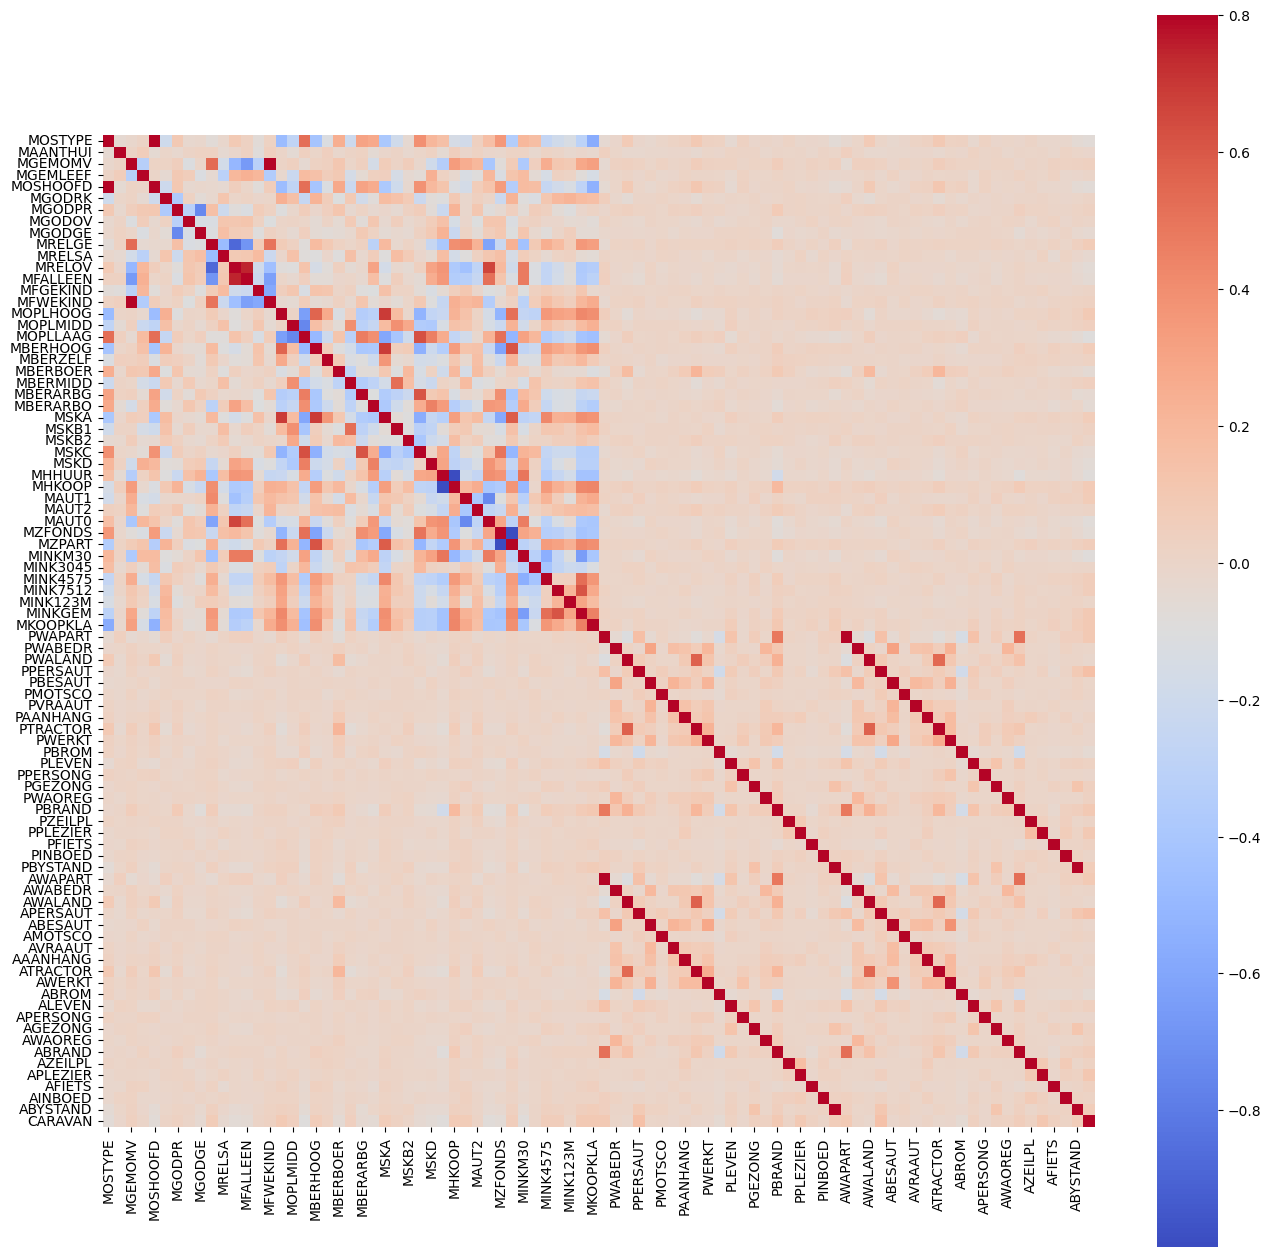

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = train_data.corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm')
plt.show()

Above is the relationship between the various attributes. As we can see there is a weak correlation between the sociodemographic attributes and the product ownership attributes, but strong correlations amongst themselves, expectedly.

<ipython-input-13-aa43279ffe6c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Social Class', y='Value', hue='CARAVAN', data=melted_social_classes, ci=None)


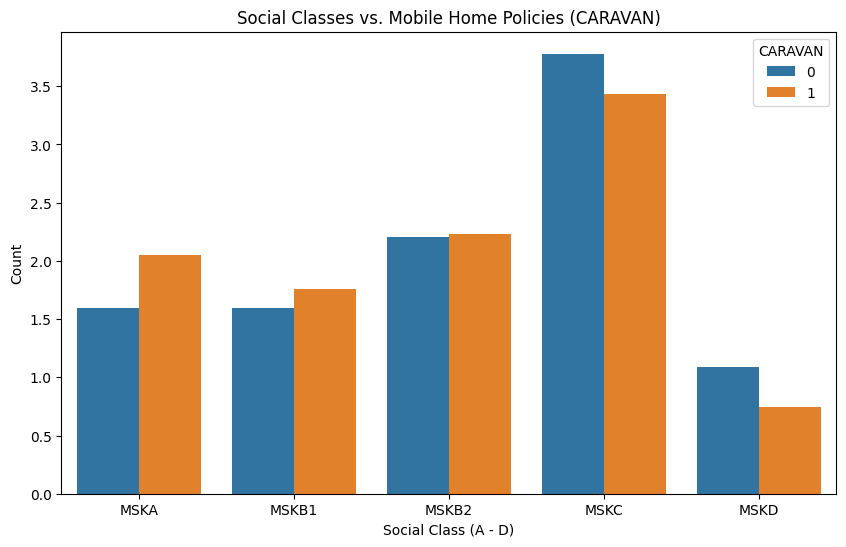

In [13]:
social_classes = train_data[['MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'CARAVAN']]
melted_social_classes = social_classes.melt(id_vars='CARAVAN', var_name='Social Class', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Social Class', y='Value', hue='CARAVAN', data=melted_social_classes, ci=None)
plt.title('Social Classes vs. Mobile Home Policies (CARAVAN)')
plt.xlabel('Social Class (A - D)')
plt.ylabel('Count')
plt.legend(title='CARAVAN')
plt.show()


<ipython-input-14-4bf61ec3b35e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Income Bracket', y='Value', hue='CARAVAN', data=melted_income_levels, ci=None)


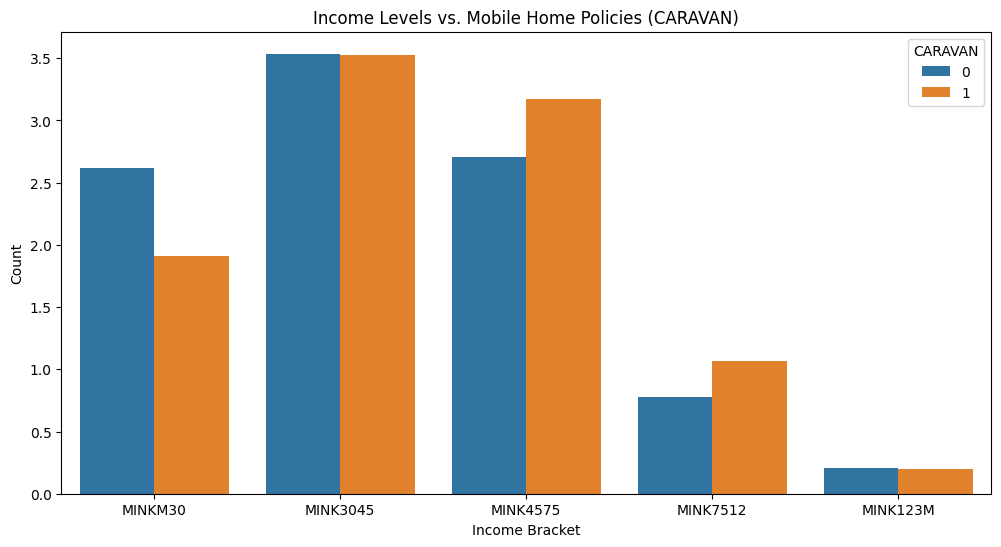

In [14]:
income_levels = train_data[['MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'CARAVAN']]
melted_income_levels = income_levels.melt(id_vars='CARAVAN', var_name='Income Bracket', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Income Bracket', y='Value', hue='CARAVAN', data=melted_income_levels, ci=None)
plt.title('Income Levels vs. Mobile Home Policies (CARAVAN)')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.legend(title='CARAVAN')
plt.show()


These are some interesting plots comparing social classes and income levels to the number of home policies owned (CARAVAN)

In [15]:
# Check for missing values in the dataset
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]



Series([], dtype: int64)

There appear to be no missing values in the data.

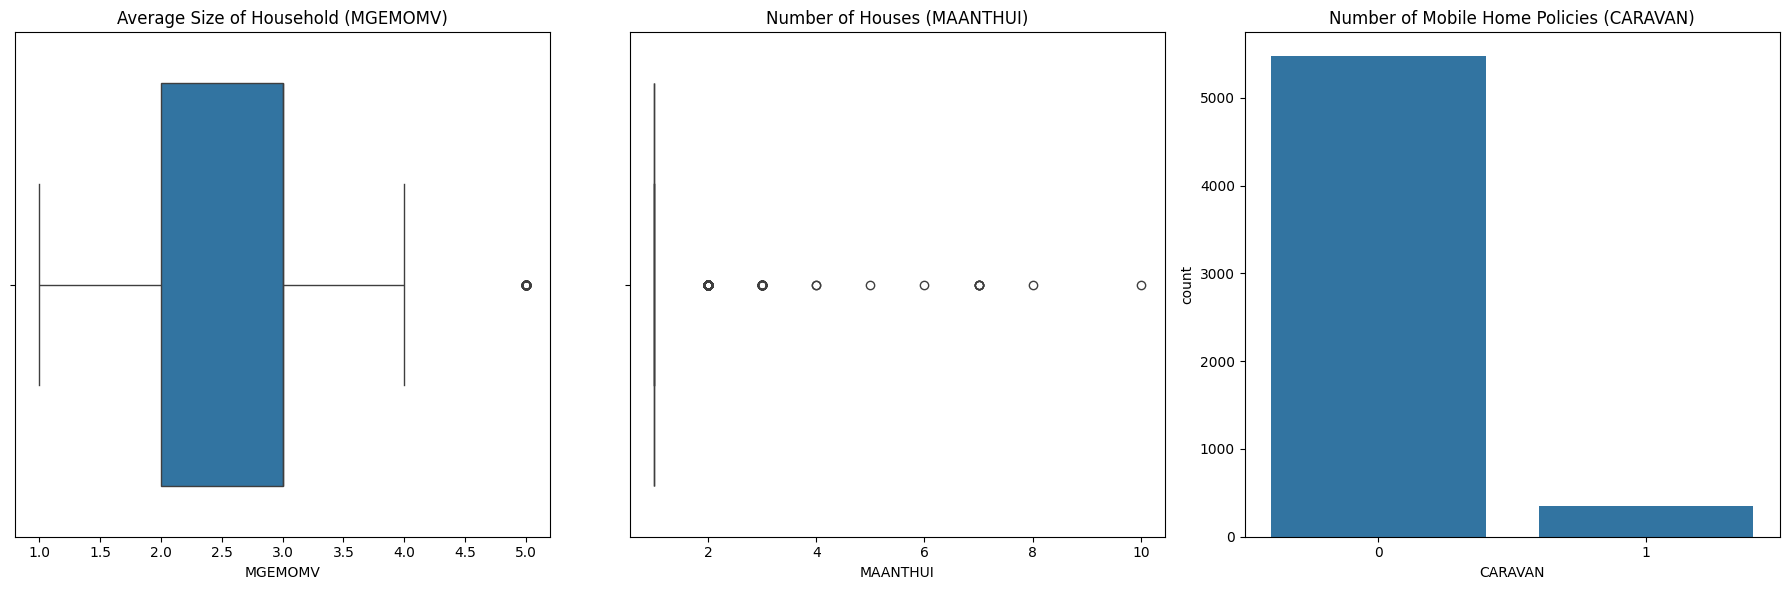

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for the average size of the household
sns.boxplot(ax=axes[0], x=train_data['MGEMOMV'])
axes[0].set_title('Average Size of Household (MGEMOMV)')

# Plot for the number of houses
sns.boxplot(ax=axes[1], x=train_data['MAANTHUI'])
axes[1].set_title('Number of Houses (MAANTHUI)')

# Plot for the number of mobile home policies
sns.countplot(ax=axes[2], x=train_data['CARAVAN'])
axes[2].set_title('Number of Mobile Home Policies (CARAVAN)')

plt.tight_layout()
plt.show()

The above are visualization of a few key variables, including the number of mobile home policies (CARAVAN), the average size of the household (MGEMOMV), and the number of houses (MAANTHUI). In the first plot, we see that customers with an average household size of 5 are outliers. In the second plot, we can see that customers who own more than 1 house are considered outliers.